Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
(256,)


C:\Users\bml05\AppData\Local\Temp\ipykernel_14192\3519563645.py:30: UserWarning: Only one segment is calculated since parameter NFFT (=32768) >= signal length (=256).
  ax[0,0].specgram(x,NFFT=32768,Fs=65536,noverlap=int(16384*0.5))
C:\Users\bml05\AppData\Local\Temp\ipykernel_14192\3519563645.py:35: UserWarning: Only one segment is calculated since parameter NFFT (=32768) >= signal length (=256).
  ax[0,1].specgram(x,NFFT=32768,Fs=50,noverlap=int(16384*0.5))


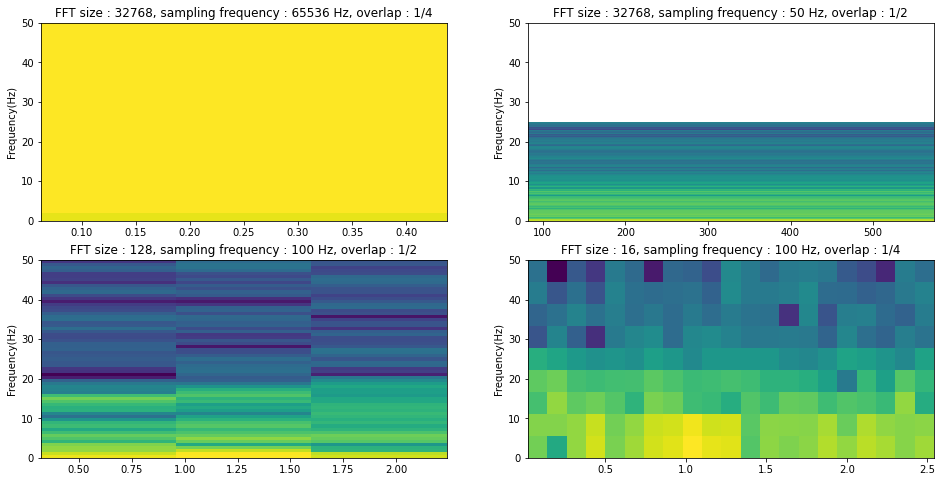

In [44]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import pandas as pd

def convert_csv(filename,sample_number=256,sensor_position='sensor position',sensor_value='sensor value',Fs=200):

    raw=pd.read_csv(filename)
    channel=raw[sensor_position].unique()
    data = np.empty((0,sample_number))
    for i in channel:
        mask=raw[sensor_position]==i
        data=np.append(data,np.array([raw[mask][sensor_value]]),axis=0)
    info=mne.create_info(ch_names=list(channel),sfreq=Fs)
    R_raw=mne.io.RawArray(data,info)
    return R_raw

raw=convert_csv('D:\Dataset\EEG\Data1.csv')
x=raw.get_data('FP1')
x=x.reshape(-1,)
print(x.shape)
'''
NFFT : fft size를 의미 -> 작을수록 시간분해능이 좋음
Fs : sampling frequency를 의미 -> 클수록 시간분해능이 좋음 (더 세세히 분해 가능)
overlap : 앞의 fft block을 중복하여 얼마나 사용하는지
'''
fig, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].specgram(x,NFFT=32768,Fs=65536,noverlap=int(16384*0.5))
ax[0,0].set_ylim([0,50])
ax[0,0].set_ylabel("Frequency(Hz)")
ax[0,0].set_title("FFT size : 32768, sampling frequency : 65536 Hz, overlap : 1/4")

ax[0,1].specgram(x,NFFT=32768,Fs=50,noverlap=int(16384*0.5))
ax[0,1].set_ylim([0,50])
ax[0,1].set_ylabel("Frequency(Hz)")
ax[0,1].set_title("FFT size : 32768, sampling frequency : 50 Hz, overlap : 1/2")

ax[1,0].specgram(x,NFFT=128,Fs=100,noverlap=int(128*0.5))
ax[1,0].set_ylim([0,50])
ax[1,0].set_ylabel("Frequency(Hz)")
ax[1,0].set_title("FFT size : 128, sampling frequency : 100 Hz, overlap : 1/2")

ax[1,1].specgram(x,NFFT=16,Fs=100,noverlap=int(8*0.5))
ax[1,1].set_ylim([0,50])
ax[1,1].set_ylabel("Frequency(Hz)")
ax[1,1].set_title("FFT size : 16, sampling frequency : 100 Hz, overlap : 1/4")
plt.show()